# Projet 1: Prédiction de l'émission de CO2 via les caracteristiques des voitures
### Réalisé par : Atiq Saida & Faik Mariama 
L'objectif du projet est de prédire la quantité de dioxyde de carbone émise par différentes voitures à l'aide de techniques d'apprentissage supervisé (en particulier, la régression est utilisée ici) et non supérvisée (Clustering: K_means).
#### La question de recherche à laquelle on veux répondre:
1. Quelle est la quantité de CO2 emis par une voiture en fonction de certains caractéristique?

1.  Comment peut-on regrouper la quantité de CO2 émise par les voitures selon leurs caractéristiques?

In [108]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import statsmodels.api as sm
# Plotting defaults
plt.rcParams['figure.figsize'] = (15, 8)
sns.set()
sns.set(font_scale=1.5)
# Display up to 80 columns to keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)
%matplotlib inline
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
path = 'C:\\Users\\LENOVO\\Documents\\data-20211119\\'
filename = 'CO2 Emissions_Canada.csv'
df = pd.read_csv(path+filename)

In [4]:
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Analyse exploratoire des données:
##### Dans cette partie on s'interesse à explorer notre jeu de données, afin de le bien comprendre, et savoir les relations entre les varibales, et puis resumer leurs principale caractéristiques en utilisants les methodes de visualisation des données 

In [5]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [6]:
#Renomer les colomes
df = df.rename(columns={'Fuel Consumption Comb (mpg)':'Fuel_Consumption_Comb'})
df = df.rename(columns={'Fuel Consumption City (L/100 km)':'Fuel_Consumption_City'})
df = df.rename(columns={'Fuel Consumption Hwy (L/100 km)':'Fuel_Consumption_Hwy'})
df = df.rename(columns={'CO2 Emissions(g/km)':'CO2_Emissions'})
df = df.rename(columns={'Fuel Consumption Comb (L/100 km)':'Fuel_Consumption_L'})
df = df.rename(columns={'Engine Size(L)':'Engine_Size'})


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_Size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel_Consumption_City,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel_Consumption_Hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel_Consumption_L,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel_Consumption_Comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2_Emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   7385 non-null   object 
 1   Model                  7385 non-null   object 
 2   Vehicle Class          7385 non-null   object 
 3   Engine_Size            7385 non-null   float64
 4   Cylinders              7385 non-null   int64  
 5   Transmission           7385 non-null   object 
 6   Fuel Type              7385 non-null   object 
 7   Fuel_Consumption_City  7385 non-null   float64
 8   Fuel_Consumption_Hwy   7385 non-null   float64
 9   Fuel_Consumption_L     7385 non-null   float64
 10  Fuel_Consumption_Comb  7385 non-null   int64  
 11  CO2_Emissions          7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [9]:
df["Make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [10]:
df["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [11]:
df["Model"].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

#### Chercher si il y a des valeurs manquantes 

In [12]:
def missing_value(x):
    return sum(x.isnull())
#Applying per column:
print("Missing values per column:")
## Check how many are missing by column, and then check which ones have any missing values
print(df.apply(missing_value, axis=0).where(lambda x : x != 0).dropna().head(20))

Missing values per column:
Series([], dtype: float64)


##### Chercher si il y a des valeurs indefini (i.e NaN)

In [13]:
def indefined_value(x):
    return sum(x.isnan())
#Applying per column:
print("indefined values per column:")
## Check how many are missing by column, and then check which ones have any missing values
print(df.apply(missing_value, axis=0).where(lambda x : x != 0).dropna().head(20))

indefined values per column:
Series([], dtype: float64)


#### Afficher les histograme associées à nos données numérique: 
Nous pouvons voir que nos données numériques sont légèrement asymétriques à droite.

[None, None, None, None, None, None, None, None, None]

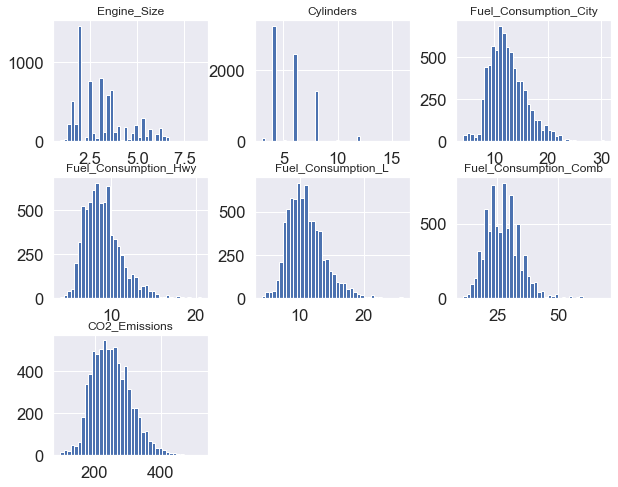

In [14]:
fig=df.hist(figsize=(10,8),bins=40)
[x.title.set_size(12) for x in fig.ravel()]

### Visualiser les fréquences pour les données non numériques
On peut voir que pour les Fuel type, le type 'N' est presque négligeable devant les autre types

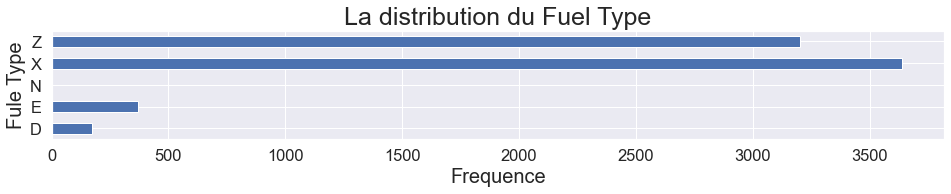

In [15]:
# La fréquence de chaque type de: Fuel Type
plt.figure(figsize=(16,2))
df.groupby('Fuel Type')['Fuel Type'].count().plot(kind='barh')
plt.title('La distribution du Fuel Type', fontsize=25)
plt.ylabel('Fule Type', fontsize=20)
plt.xlabel('Frequence', fontsize=20)
plt.show()

In [16]:
df[df['Fuel Type'] == 'N'].count()

Make                     1
Model                    1
Vehicle Class            1
Engine_Size              1
Cylinders                1
Transmission             1
Fuel Type                1
Fuel_Consumption_City    1
Fuel_Consumption_Hwy     1
Fuel_Consumption_L       1
Fuel_Consumption_Comb    1
CO2_Emissions            1
dtype: int64

##### On observe donc que on a seulement une valeur pour le Fuel type correspond à  N, alors on va la suprimer car il n'aura pas d'influence sur nos données

In [17]:
ind = df.index[(df['Fuel Type'] == 'N')] # Trouver l'index associée a la ligne qu'on veut supprimer 
df = df.drop(ind)# Supprimer la ligne 

#### Cette distribution selon les fabriquants nous montre qu'il y a des faible fréquence sur certain valeur de "Make" que pouvait supprimer

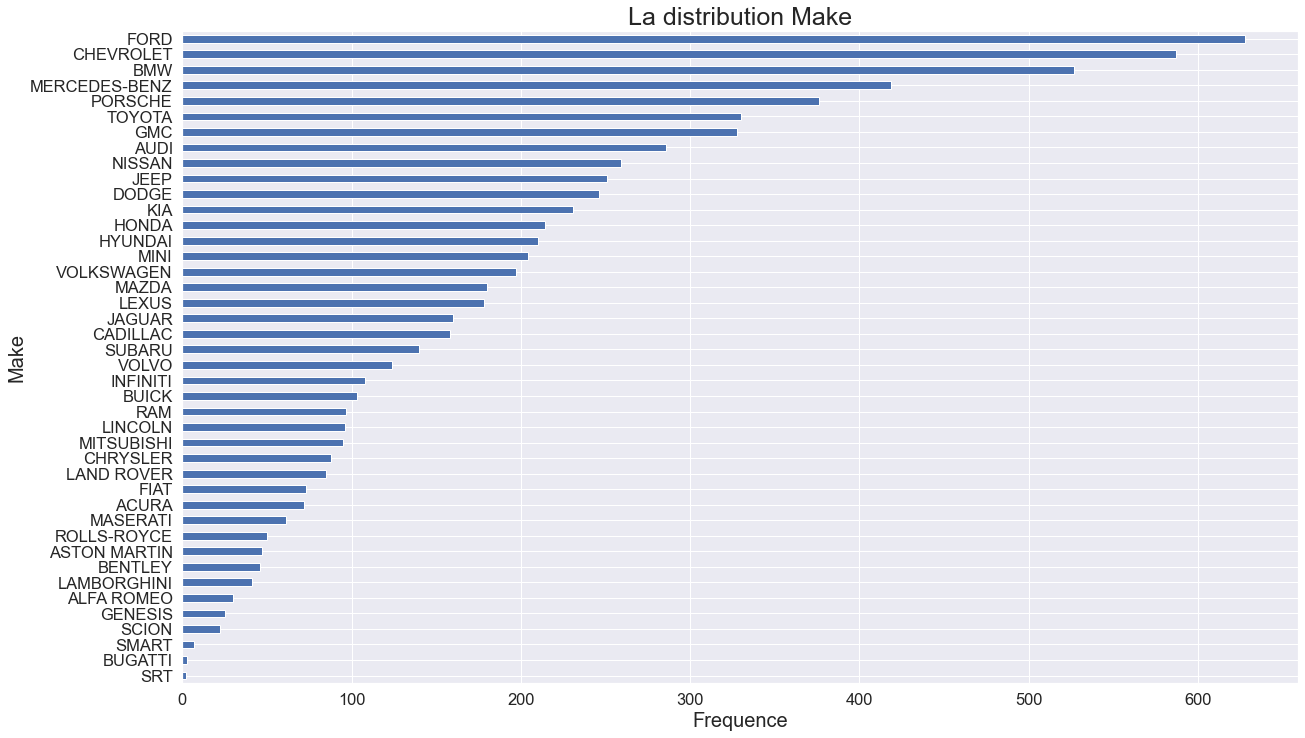

In [18]:
# La fréquence de de nos données selon les fabriquants 
plt.figure(figsize=(20,12))
df.groupby('Make')['Make'].count().sort_values().plot(kind='barh')
plt.title('La distribution Make', fontsize=25)
plt.ylabel('Make', fontsize=20)
plt.xlabel('Frequence', fontsize=20)
plt.show()

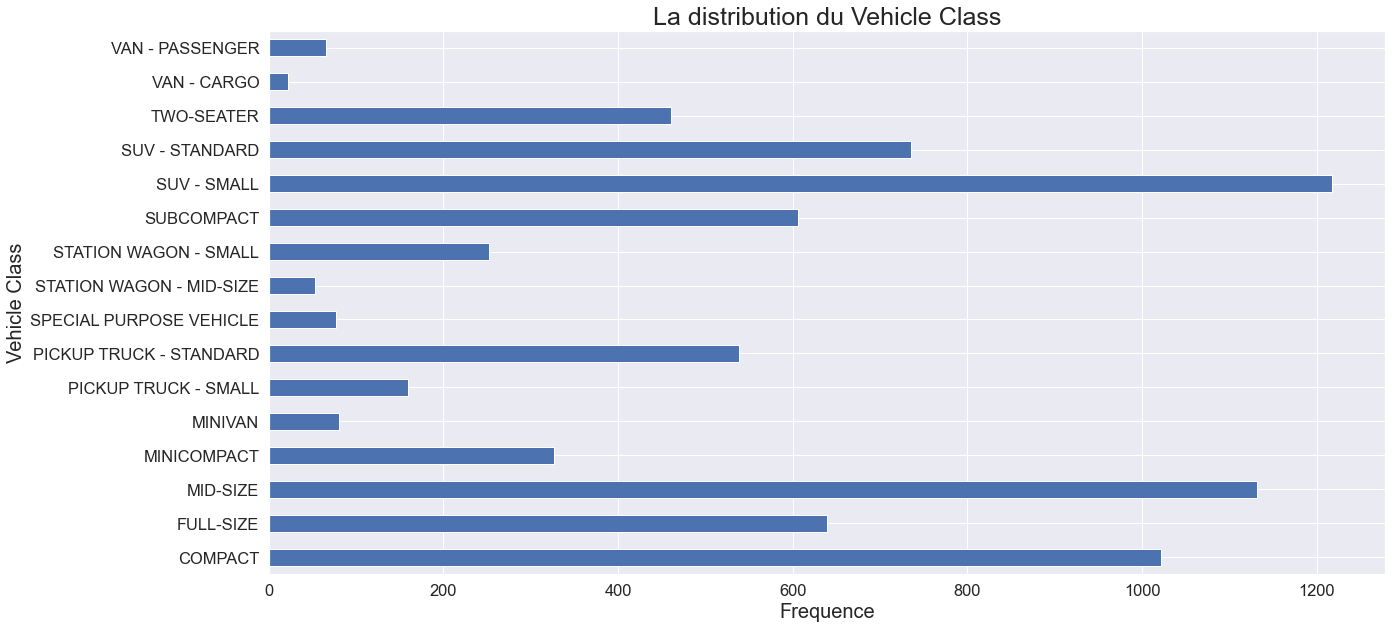

In [19]:
# La fréquence des vehicule Class
plt.figure(figsize=(20,10))
df.groupby('Vehicle Class')['Vehicle Class'].count().plot(kind='barh')
plt.title('La distribution du Vehicle Class', fontsize=25)
plt.ylabel('Vehicle Class', fontsize=20)
plt.xlabel('Frequence', fontsize=20)
plt.show()

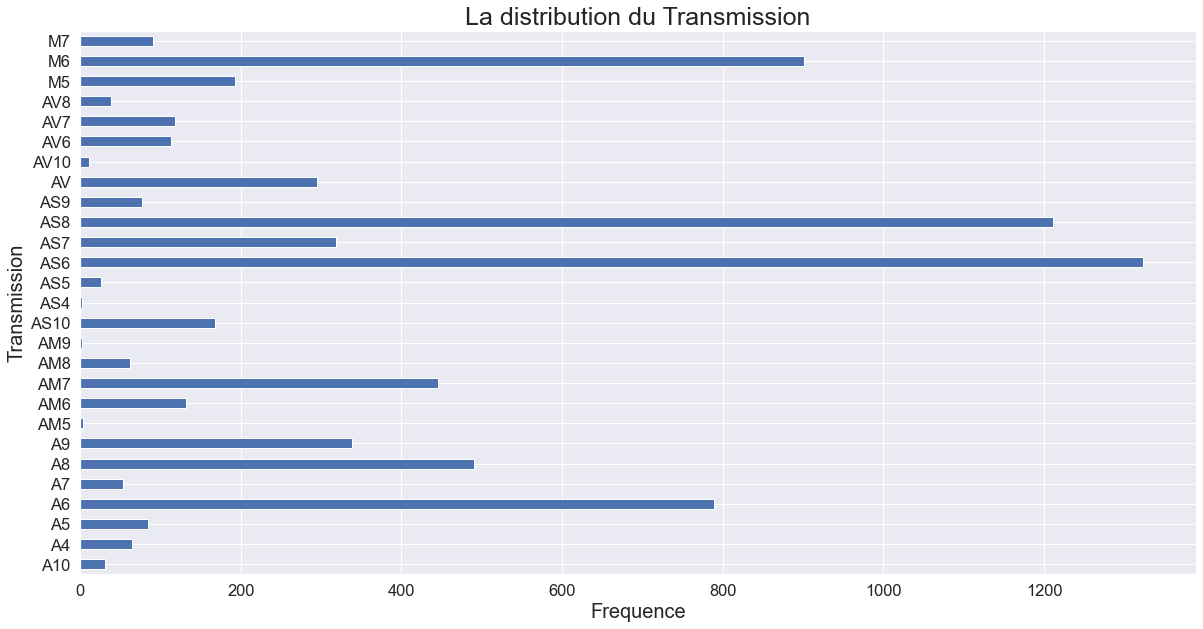

In [20]:
# La fréquence des vehicule Class
plt.figure(figsize=(20,10))
df.groupby('Transmission')['Transmission'].count().plot(kind='barh')
plt.title('La distribution du Transmission', fontsize=25)
plt.ylabel('Transmission', fontsize=20)
plt.xlabel('Frequence', fontsize=20)
plt.show()

##### On peut voire que la Class du Vehicule influence la valeur de CO2 Emission

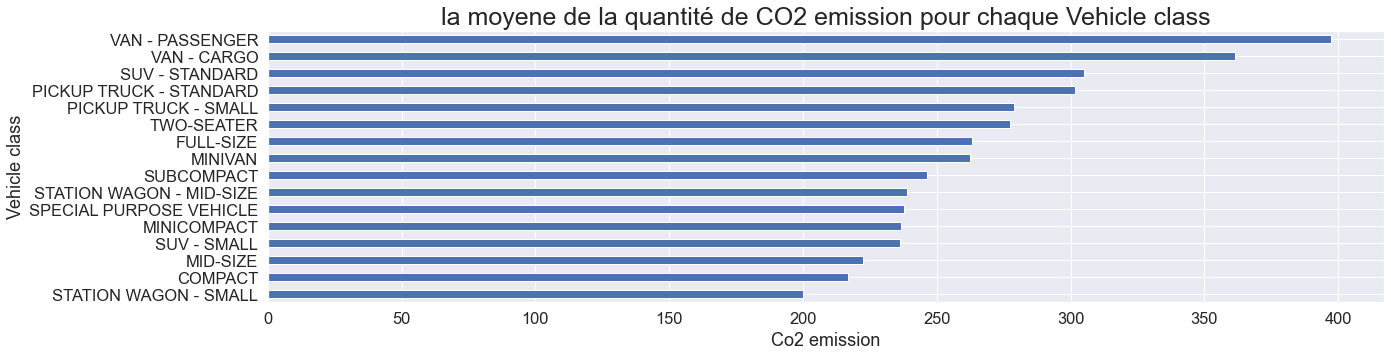

In [21]:
plt.figure(figsize=(20,5))

df.groupby('Vehicle Class')['CO2_Emissions'].mean().sort_values().plot(kind='barh')

plt.title('la moyene de la quantité de CO2 emission pour chaque Vehicle class', fontsize=25)
plt.xlabel('Co2 emission')
plt.ylabel('Vehicle class')
plt.show()

##### Là aussi en peut voire que la marque de la vehicule influence la veleurs de CO2 Emissions

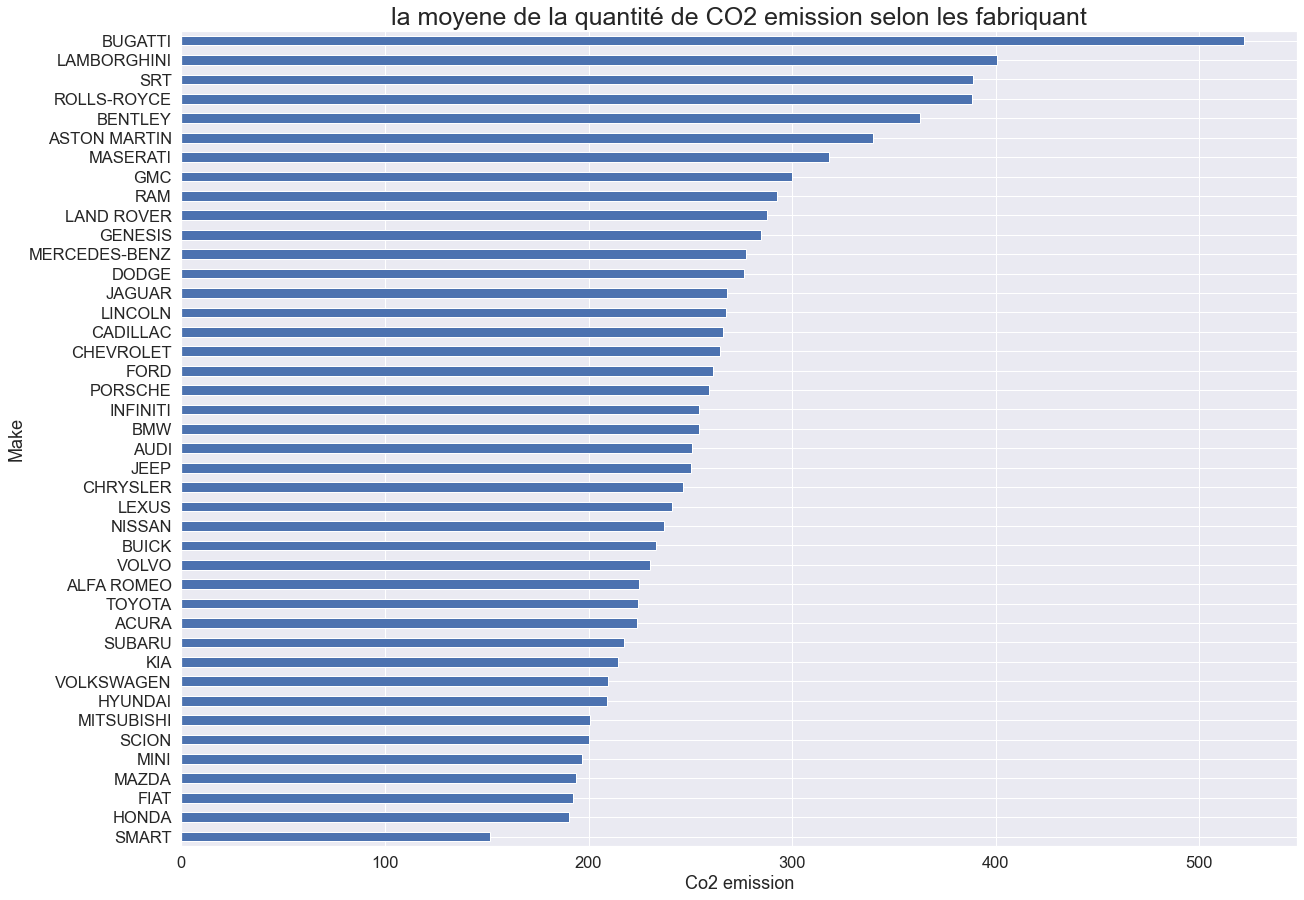

In [22]:
plt.figure(figsize=(20,15))
df.groupby('Make')['CO2_Emissions'].mean().sort_values().plot(kind='barh')
plt.title('la moyene de la quantité de CO2 emission selon les fabriquant', fontsize=25)
plt.xlabel('Co2 emission')
plt.ylabel('Make')
plt.show()

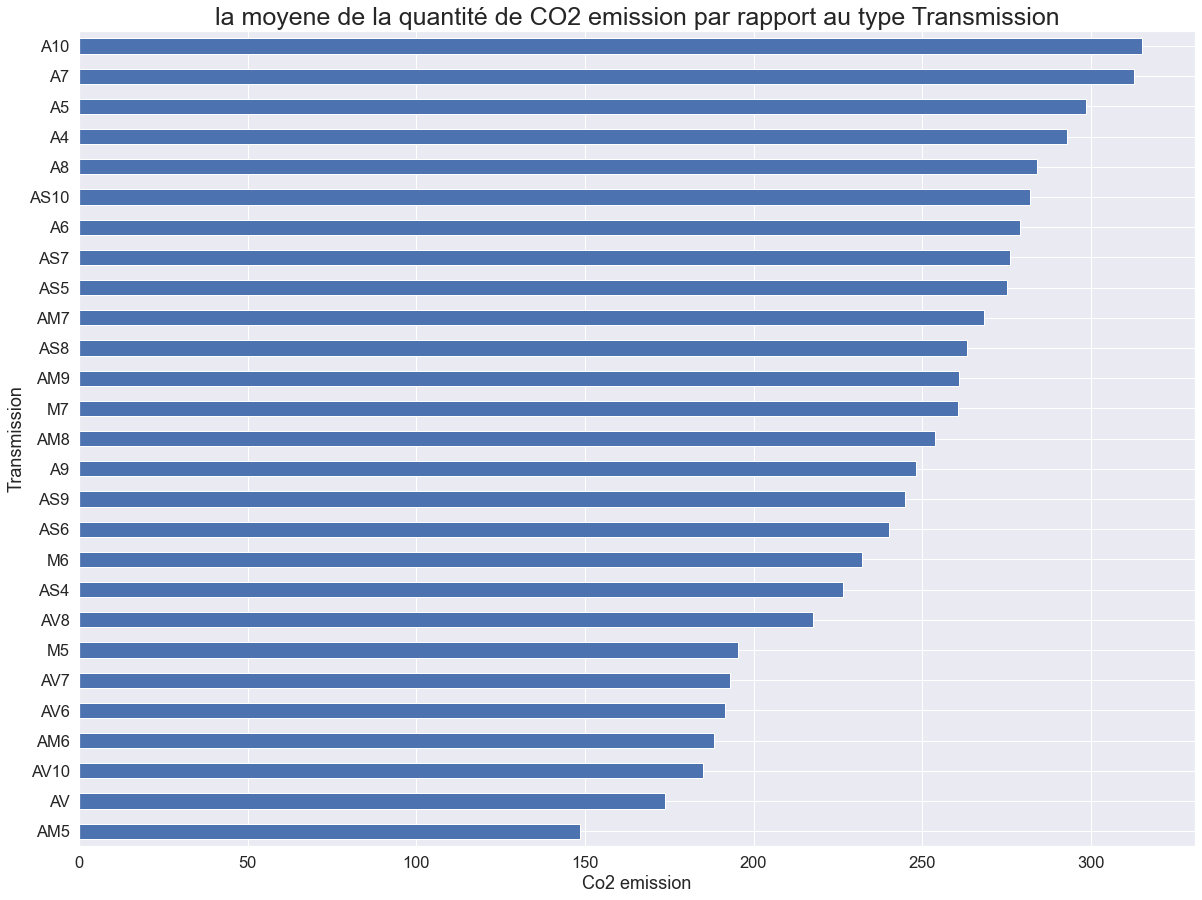

In [23]:
plt.figure(figsize=(20,15))
df.groupby('Transmission')['CO2_Emissions'].mean().sort_values().plot(kind='barh')
plt.title('la moyene de la quantité de CO2 emission par rapport au type Transmission', fontsize=25)
plt.xlabel('Co2 emission')
plt.ylabel('Transmission')
plt.show()

<Figure size 720x576 with 0 Axes>

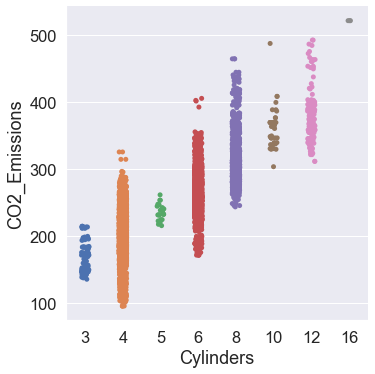

In [24]:
plt.figure(figsize=(10,8))

sns.catplot(x='Cylinders', y='CO2_Emissions',data = df)

plt.show()   

###### On observe que la quatité de CO2_Emessions augmente avec le nobre des cylindres

# Regression Linéaire

### On commence tout d'abord par un modèle de regression linéaire pour répondre à notre question de recherche 

### Matrice de correlation

The correlation DataFrame is:


Text(0.5, 1.0, 'Correlation')

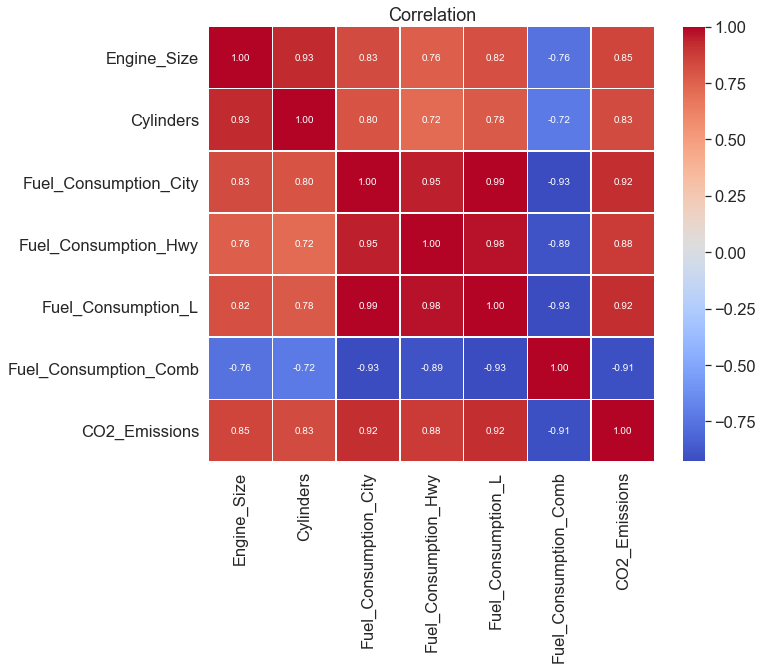

In [25]:
corr_df = df.corr()
print("The correlation DataFrame is:")
#Visualisation de la matrice de correlation
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr_df, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

In [26]:
df[df.columns[1:]].corr()['CO2_Emissions'].sort_values()

Fuel_Consumption_Comb   -0.907553
Cylinders                0.832688
Engine_Size              0.851203
Fuel_Consumption_Hwy     0.883581
Fuel_Consumption_L       0.918151
Fuel_Consumption_City    0.919719
CO2_Emissions            1.000000
Name: CO2_Emissions, dtype: float64

# selection de variables
La variable cible qu'on cherche à prédire est CO2 Emissions, d'après la matrice de correlation, cette varibale est fortement corrélées avec: Fuel Consumption City (L/100km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km), et Fuel Consumption Comb (mpg).

Suite à la matrice de correlation on voit que les variable suivants sont fortement corrélées : Fuel Consumption City (L/100km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km), et Fuel Consumption Comb (mpg).  

Dans un premier temps on Commence a visualiser la relation entre la variable cible et les autres variables numériques au quel elle est correlée. 

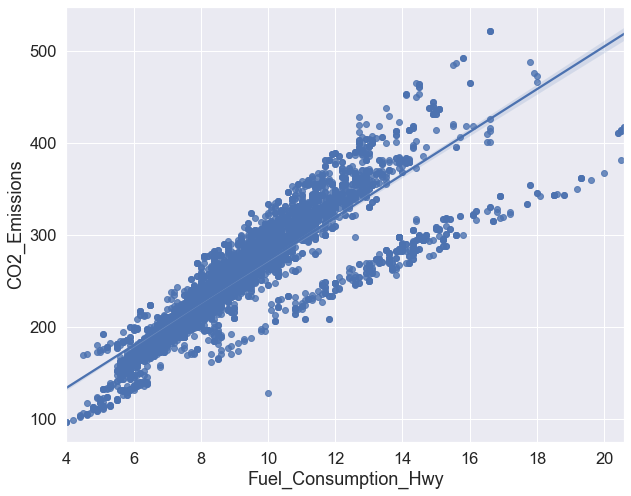

In [27]:
ax = sns.regplot(x='Fuel_Consumption_Hwy', y='CO2_Emissions', scatter=True, data=df)

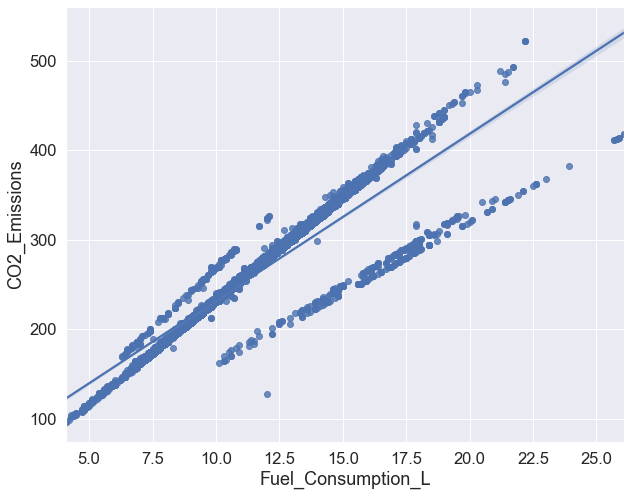

In [28]:
ax = sns.regplot(x='Fuel_Consumption_L', y='CO2_Emissions', scatter=True, data=df)

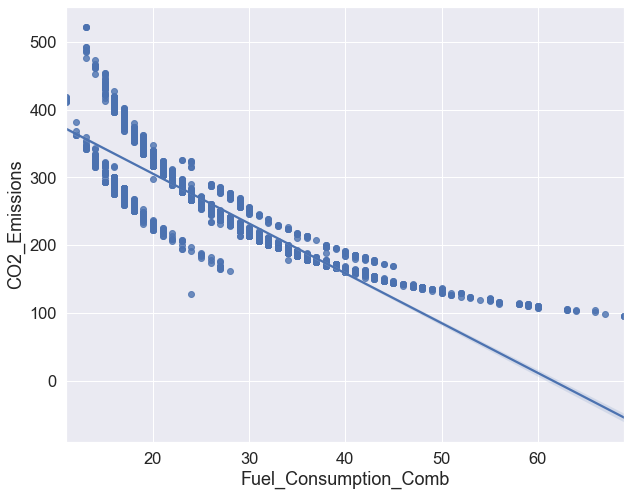

In [29]:
ax = sns.regplot(x='Fuel_Consumption_Comb', y='CO2_Emissions', scatter=True, data=df)

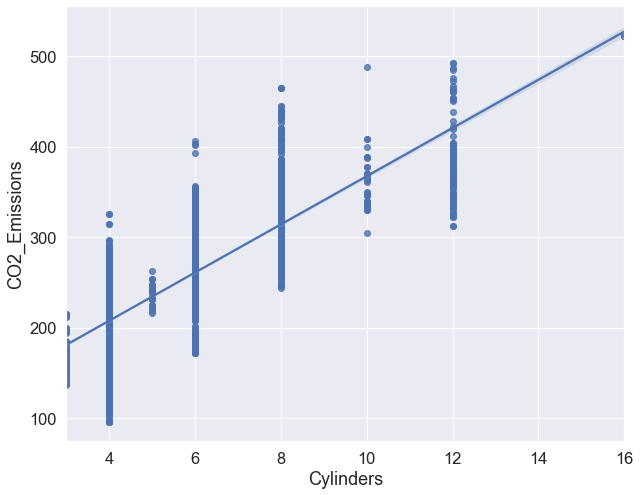

In [30]:
ax = sns.regplot(x='Cylinders', y='CO2_Emissions', scatter=True, data=df)

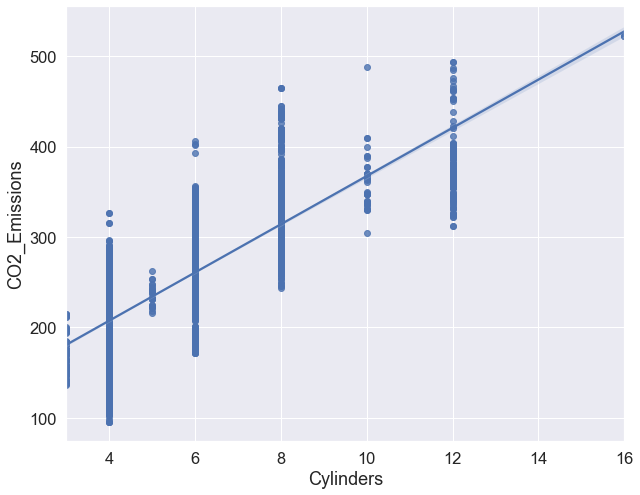

In [31]:
ax = sns.regplot(x='Cylinders', y='CO2_Emissions', scatter=True, data=df)

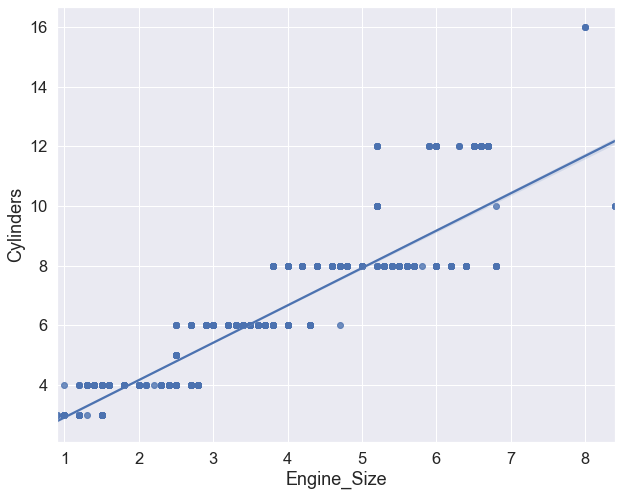

In [32]:
ax = sns.regplot(x='Engine_Size', y='Cylinders', scatter=True, data=df)

On peut voir qu'il existe une relation linéaire forte entre la variable cible (CO2_Emission) et 'Fuel_Consumption_L', ainsi qu'avec Fuel_Consumption_Hwy, or qu'il apparait faible avec 'Fuel_Consumption_Comb'.
Pour les variables 'Engine_size' et 'Cylindres' n'ont pas de relation linéare avec la variable qu'on cherche à prédire.

# Regression Univariée

###### On commence par une regression univariée, là on choisi comme variable explecative, celle qui est fortement correlé avec la variable cible, autrement dire:
##### predicted_CO2_Emission= intercept + coef*Fuel_Consumption_Comb_City

In [33]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'CO2_Emissions'
y = df[y_column]
# Define our independent variables
x_columns = ['Fuel_Consumption_City']
X = df[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.231e+04
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:04:14   Log-Likelihood:                -26891.
No. Observations:                5907   AIC:                         5.379e+04
Df Residuals:                    5905   BIC:                         5.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Fuel_Consumption_City    15.33

La valeur de l'intercept est donnée par :

In [35]:
model_fit.params.intercept

58.16594705683856

Le coeficient associée à Fuel Consumption Comb City, est donnée par :

In [36]:
model_fit.params.Fuel_Consumption_City

15.33172273488773

In [37]:
y_pred_test = model_fit.predict(X_test)

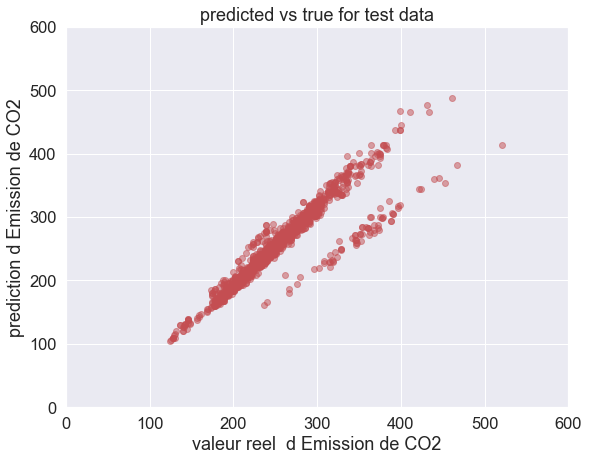

In [38]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('valeur reel  d Emission de CO2')
plt.ylabel('prediction d Emission de CO2' )
axes = plt.gca()
axes.set_xlim([0,600])
axes.set_ylim([0,600])
plt.show();

In [39]:
OutY_Predicted = y_pred_test
rsquared = y_test.corr(OutY_Predicted)**2
rsquared

0.8474339388984184

#### on a obtenu une valeur de R_squared assez grand pour les deux donnée (test & training), visualisons maintenant la relation entre les valeurs prédis et les vrai valeurs de notre variable cible

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

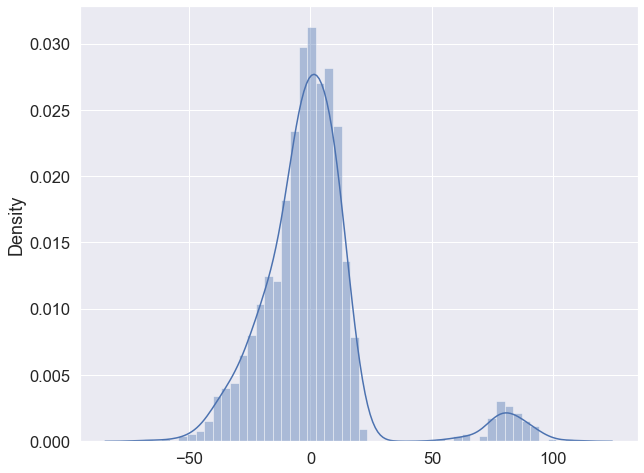

In [40]:
sns.distplot(y_pred_test-y_test)

Text(0, 0.5, 'y_pred')

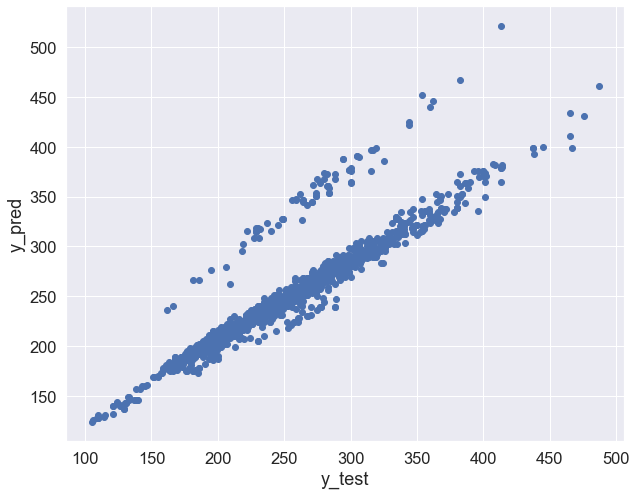

In [41]:
plt.scatter( y_test,y_pred_test)
plt.xlabel('y_test')
plt.ylabel('y_pred')


##### Les résultas qu'on a obtenus  semble constamment bons (la plupart des points semblent être sur la ligne y=x). Mais pour avoir plus de précision Nous allons essayer d'améliorer ce modèle en utilisant la régression multivariée.

# Regression Multivariée

##### A ce niveau on va essayée d'améliorer notre modèle en  ajoutant  d'autre variable explecative ayant une correlation avec la variable cible qu'on cherche à prédire (CO2 Emission)
##### Dans un premier temps on va ajouter les variables de type 'numérique'
##### On se basant sur les résultats obtenu dans la partie Analyse exploratoire, on doit choisir les variables explecatives pour notre regression multivariée on prenant en considération les cinq hypothèses pour utilisée ce modèle à savoir: 
1. Relation linéaire entre x et y
1. Normalité 
1. Multicollinéarité minimale 
1. Pas d'autocorrélation
1. Homoscédasticité 

Pour cela on choisi comme variables explecative:'Cylindre' et 'Fuel Consumption Comb'

In [42]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'CO2_Emissions'
y = df[y_column]
# Define our independent variables
x_columns = ['Fuel_Consumption_Comb','Cylinders']
X = df[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                 2.423e+04
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:04:28   Log-Likelihood:                -25850.
No. Observations:                5907   AIC:                         5.171e+04
Df Residuals:                    5904   BIC:                         5.173e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Fuel_Consumption_Comb    -5.18

In [44]:
model = sm.OLS(endog=y_test, exog=X_test)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     5839.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:04:29   Log-Likelihood:                -6501.1
No. Observations:                1477   AIC:                         1.301e+04
Df Residuals:                    1474   BIC:                         1.302e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Fuel_Consumption_Comb    -5.13

### C'est déjà BON !
Nous avons augmenté notre R-carré ajusté de 0,84 à 0,88. L'examen des P valeurs  nous indique également que tous les coefficients sont significatifs.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

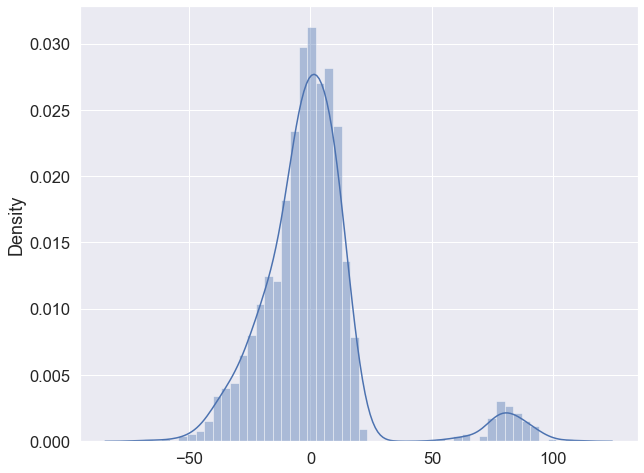

In [45]:
sns.distplot(y_pred_test-y_test)

#### Peut on améliorer encor notre model? OUI

Pour encore améliorer notre modèle on pourrait inclure les variables catégorielles que nous n'avons pas utilisées jusqu'à présent (c'est-à-dire 'Fuel Type', 'Transmission', 'Make'), Pour cela on doit premièrement transformer nos données catégorielles en données numerique 

In [65]:
#transformer les données de Fuel gaz en donnée numérique
df1 =pd.get_dummies(df['Fuel Type'], prefix='Fuel')
df2 = pd.get_dummies(df['Transmission'])
df3 = pd.get_dummies(df['Make'])
df1.head()
#df['Fuel Type'].unique()

,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [93]:
df_new = [df, df1,df3]
df_new = pd.concat(df_new, axis=1)
df_new.drop(['Fuel Type'], inplace=True, axis=1)
df_new.drop(['Transmission'], inplace=True, axis=1)
df_new.drop(['Make'], inplace=True, axis=1)
df_new.drop(['Model'], inplace=True, axis=1)
df_new.drop(['Vehicle Class'], inplace=True, axis=1)
df_new.drop(['Fuel_Consumption_City'], inplace=True, axis=1)
df_new.drop(['Engine_Size'], inplace=True, axis=1)
df_new.drop(['Fuel_Consumption_L'], inplace=True, axis=1)
df_new.drop(['CO2_Emissions'], inplace=True, axis=1)
df_new.drop(['Fuel_Consumption_Hwy'], inplace=True, axis=1)
df_new.head()

,Cylinders,Fuel_Consumption_Comb,Fuel_D,Fuel_E,Fuel_X,Fuel_Z,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUGATTI,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FIAT,FORD,GENESIS,GMC,HONDA,HYUNDAI,INFINITI,JAGUAR,JEEP,KIA,LAMBORGHINI,LAND ROVER,LEXUS,LINCOLN,MASERATI,MAZDA,MERCEDES-BENZ,MINI,MITSUBISHI,NISSAN,PORSCHE,RAM,ROLLS-ROYCE,SCION,SMART,SRT,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO
0,4,33,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,29,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,48,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,25,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,27,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Maintenent qu'on a transformer nos données catégorielles en données numerique on peut construire le modèle de regression multivariée

In [94]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'CO2_Emissions'
y = df[y_column]
# Define our independent variables
X = df_new
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
X.head()

,Cylinders,Fuel_Consumption_Comb,Fuel_D,Fuel_E,Fuel_X,Fuel_Z,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUGATTI,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FIAT,FORD,GENESIS,GMC,HONDA,HYUNDAI,INFINITI,JAGUAR,JEEP,KIA,LAMBORGHINI,LAND ROVER,LEXUS,LINCOLN,MASERATI,MAZDA,MERCEDES-BENZ,MINI,MITSUBISHI,NISSAN,PORSCHE,RAM,ROLLS-ROYCE,SCION,SMART,SRT,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO
0,4,33,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,29,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,48,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,25,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,27,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1839.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:20:55   Log-Likelihood:                -24323.
No. Observations:                5907   AIC:                         4.874e+04
Df Residuals:                    5860   BIC:                         4.905e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Cylinders                 9.84

In [103]:
model1 = sm.OLS(endog=y_test, exog=X_test)
model1_fit = model1.fit()
print(model1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     448.8
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:35:31   Log-Likelihood:                -6144.1
No. Observations:                1477   AIC:                         1.238e+04
Df Residuals:                    1433   BIC:                         1.261e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Cylinders                10.58

#### Great News!
C'est déjà bon, on a augmenté notre R_squared de 0.88 à 0.93 par l'addition des covariables catégorielle.

L'examen des p valeurs nous indique également que tous les coefficients sont significatifs.

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred = model.predict(X_test)
y_pred

array([339.34441591, 296.89583563, 333.49585174, ..., 330.00233941,
       192.52181859, 173.71014054])

In [111]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [112]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

,pred_values,real_values
0,339.34,368.0
1,296.90,290.0
2,333.50,382.0
3,213.34,211.0
4,194.46,193.0
...,...,...
1472,233.69,235.0
1473,259.14,263.0
1474,330.00,346.0
1475,192.52,193.0


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2_Emissions', ylabel='Density'>

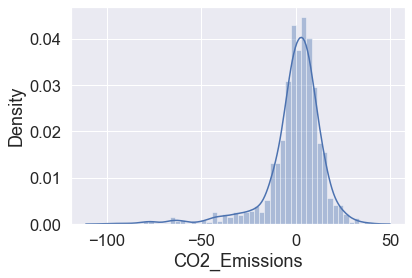

In [114]:
sns.distplot(y_pred-y_test)

Text(0, 0.5, 'y_pred')

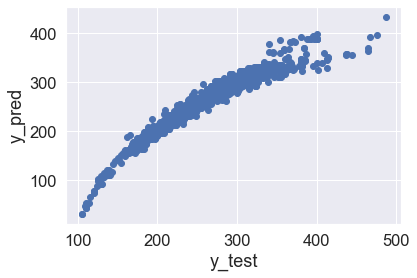

In [115]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### Conclusion
On a donc arrivé à construir un model de regression lineare pour prédire la valeurs de l'emission de CO2 basé sur les caracteristique de chaque vehicule.

# Clustering : K_means Algorithm

Le clustering est une discipline particulière du Machine Learning ayant pour objectif de séparer les données en groupes homogènes ayant des caractéristiques communes. L’algorithme des K-moyennes (K-means) est un algorithme non supervisé très connu en Clustering.

Dans cette partie de notebook on va:
- Charger et explorer notre jeu de données.
- Trouver des clusters avec l'algorithme k-means comme technique d'apprentissage non supervisé.

In [116]:

# K-Means clustering algorithm
from sklearn.cluster import KMeans

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Places the plots in the Jupyter Notebook
%matplotlib inline

# PCA dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Keep everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

In [117]:
# Keep only the relevant columns
column_1 = 'CO2_Emissions'
column_2 = 'Cylinders'
ds = df[[column_1, column_2]] 
ds.head(5)

,CO2_Emissions,Cylinders
0,196,4
1,221,4
2,136,4
3,255,6
4,244,6


Choisissons quelques caractéristiques numériques continues intéressantes à analyser

## Quel est le lien entre l'emissions de CO2 et  le nombre des cylinders	?

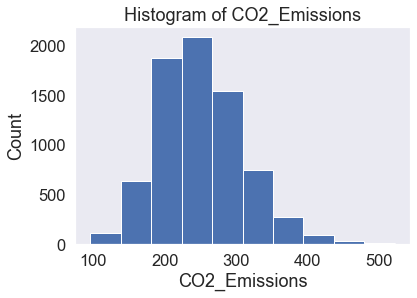

In [118]:
ax = ds.CO2_Emissions.hist(grid=False);

ax.set(xlabel='CO2_Emissions', 
       ylabel='Count', 
       title='Histogram of CO2_Emissions');  

On observe que la distribution des grandeurs suit une gaussienne

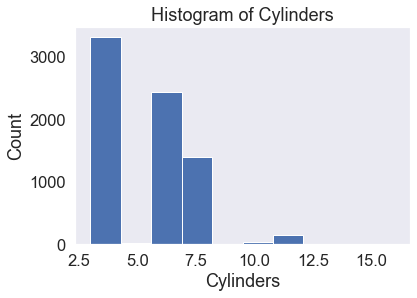

In [119]:
ax = ds.Cylinders.hist(grid=False);

ax.set(xlabel='Cylinders', 
       ylabel='Count', 
       title='Histogram of Cylinders');  

On observe un nombre important pour les vehicules de 4, 6 et 8 cylinders, alors qu'on a des faibles valeurs pour le reste.

# Traçons la relation entre ces deux variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


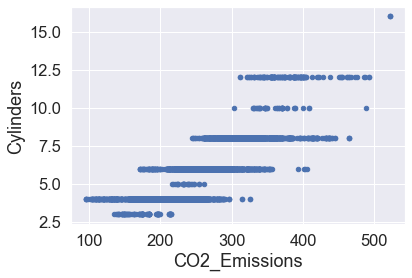

In [120]:
# Plot the relationship between these two variables
df.plot.scatter(x=column_1,
                y=column_2);

Comment pouvons-nous interpréter la relation entre l'emissions de CO2 et les cylinders ?

On observe une forte émission de CO2 pour des véhicules ayant un grand nombre de cylindres.

# Ajuster nos données avec k-means.

In [121]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(ds);

Maintenant que nous avons des clusters, on va de les visualiser.

In [122]:
# Add the cluster labels for each data point to the dataframe
ds['kmeans_labels'] = kmeans.labels_

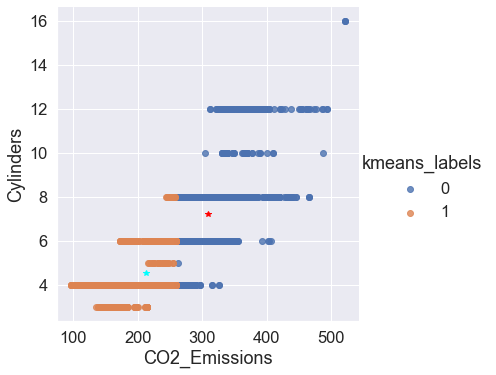

In [123]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                       y=column_2, 
                       data=ds, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
# kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

On observe que les véhicules sont divisées en deux groupes. Le premier groupe sont les véhicules d'une faible émissions de CO2 avec moins de cylinders (4 , 6 cylinders) alors que le deuxième groupe sont les véhicules d'une forte émissions de CO2 avec un nombre important (8 , 10 et 12 cylinders) de cylinders.

## Choisir le nombre de clusters

## Méthode du coude pour explorer le nombre de clusters

Contrairement à l'apprentissage supervisé où nous avons la vérité fondamentale pour évaluer les performances du modèle, l'analyse de clustering ne dispose pas d'une métrique d'évaluation solide que nous pouvons utiliser pour évaluer le résultat de différents algorithmes de clustering. De plus, comme kmeans nécessite k comme entrée et ne l'apprend pas à partir des données, il n'y a pas de bonne réponse en termes de nombre de clusters que nous devrions avoir dans n'importe quel problème. Parfois, la connaissance du domaine et l'intuition peuvent aider, mais ce n'est généralement pas le cas. Dans la méthodologie de prédiction de cluster, nous pouvons évaluer les performances des modèles en fonction de différents clusters K puisque les clusters sont utilisés dans la modélisation en aval.

Même si nous connaissons déjà le nombre optimal de clusters, nous avons pensé que nous pourrions encore bénéficier de sa détermination à l'aide de la méthode du coude.

In [124]:
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(ds).score(ds) 
              for i, model in enumerate(k_mean_models)]

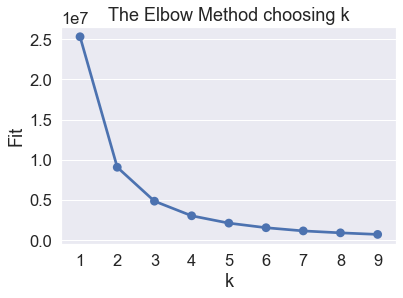

In [125]:
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

Ensuite, nous allons catégoriser les données en utilisant le nombre optimal de clusters 3.

Recommencer avec le nombre de cluster égale le nombre au coude trouvé

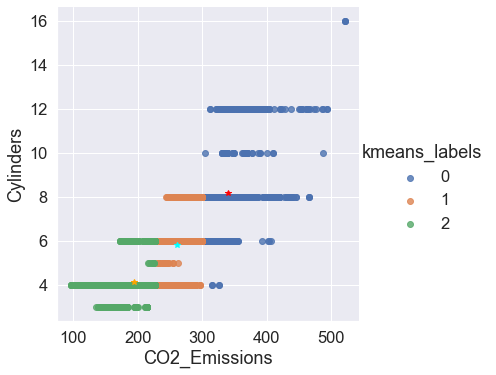

In [127]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3) # Number of clusters should be 4
kmeans.fit(ds);

# Add the cluster labels for each data point to the dataframe
ds['kmeans_labels'] = kmeans.labels_

# Plot k-means
kmeans_plot = sns.lmplot(x=column_1,
                       y=column_2, 
                       data=ds, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

L'algorithme a regroupé les véhicule en trois groupes : des véhicules d'une faible émissions de CO2, des véhicules d'une moyenne émissions de CO2 et des véhicules d'une forte émissions de CO2 en fonctionne du nombre de cylinders.

## Quel est le lien entre l'emissions de CO2 et le nombre la taille du moteur ?

In [128]:
#df = df.rename(columns={'CO2 Emissions(g/km)':'co2_emission'})
df = df.rename(columns={'Engine Size(L)':'Engine_Size'})

In [129]:
# Keep only the relevant columns
column_3 = 'CO2_Emissions'
column_4 = 'Engine_Size'
dk = df[[column_3, column_4]]

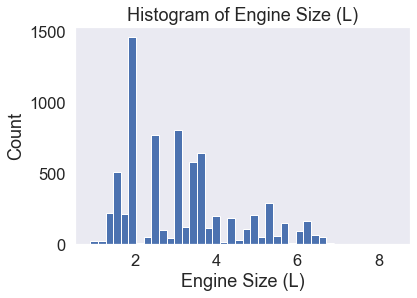

In [130]:
ax = dk.Engine_Size.hist(grid=False,bins=40);

ax.set(xlabel='Engine Size (L)', 
       ylabel='Count', 
       title='Histogram of Engine Size (L)'); 

On observe un nombre important des moteurs de taille 2.

# Traçons la relation entre ces deux variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


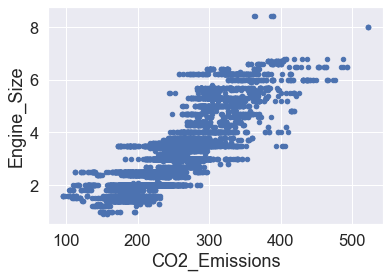

In [132]:
# Plot the relationship between these two variables
df.plot.scatter(x=column_3,
                y=column_4);

On obserbe que la quantité d'emissions de CO2 s'augmente avec l'augmentation du nombre de moteurs.

## Ajuster nos données avec k-means.

In [133]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(dk);

Maintenant que nous avons des clusters, on va de les visualiser.

In [134]:
# Add the cluster labels for each data point to the dataframe
dk['kmeans_labels'] = kmeans.labels_

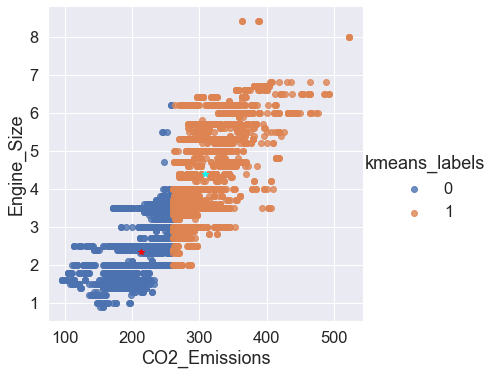

In [135]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_3, 
                       y=column_4, 
                       data=dk, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

On observe que les véhicules sont divisées en deux groupes. Le premier groupe sont les véhicules d'une faible émissions de CO2 avec moins des moteurs de petite taille alors que le deuxième groupe sont les véhicules d'une forte émissions de CO2 avec des moteurs de grande taille.

## Choisir le nombre de clusters

## Méthode du coude pour explorer le nombre de clusters

De même, on va déterminer le nombre optimal de clusters à l'aide de la méthode du coude

In [136]:
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(dk).score(dk) 
              for i, model in enumerate(k_mean_models)] 

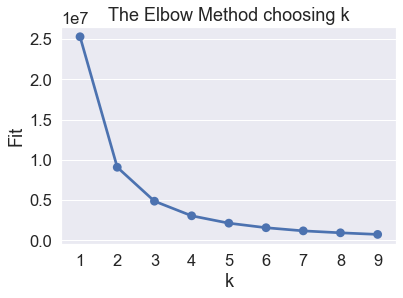

In [137]:
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

Donc nous allons catégoriser les données en utilisant le nombre optimal de clusters 3.

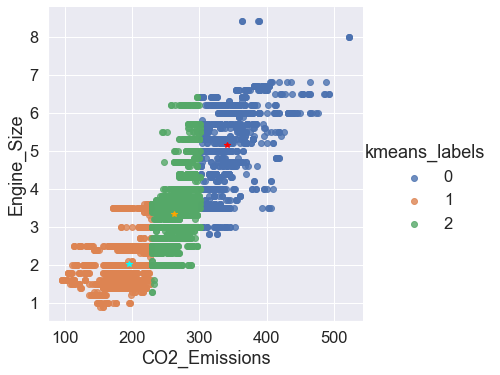

In [138]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3) # Number of clusters should be 4
kmeans.fit(dk);

# Add the cluster labels for each data point to the dataframe
dk['kmeans_labels'] = kmeans.labels_

# Plot k-means
kmeans_plot = sns.lmplot(x=column_3,
                       y=column_4, 
                       data=dk, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

L'algorithme a regroupé les véhicule en trois groupes : des véhicules d'une faible émissions de CO2, des véhicules d'une moyenne émissions de CO2 et des véhicules d'une forte émissions de CO2 en fonctionne de la taille des moteurs.

# Conclusion


L'algorithme de k-means a regroupé nos données en des groupes selon la quantité d'émission de CO2 en fonction du nombre de cylindres ou de la taille des moteurs. Dans les deux cas on a observé que les groupes qu'on a obtenu ne sont pas bien divisés, donc on peut conclure que le k-means n'est pas un modèle convenable pour notre jeu de données.